<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_Heat-TreesPHL/blob/main/Regressions_12_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')

#Files from the drive
ct_tree_file = "/content/drive/MyDrive/Colab Notebooks/ct_trees.csv"
heat_file = "/content/drive/MyDrive/Colab Notebooks/heat.csv"

ct_tree = pd.read_csv(ct_tree_file)
heat = pd.read_csv(heat_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
heat

,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh
0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458
1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750
2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750
3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359
4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631
...,...,...,...,...,...
369,42101036203,-1.626316,"POLYGON ((-74.9648847150604 40.0772810971776, ...",291,13.536082
370,42101035302,-0.934188,"POLYGON ((-74.9875706652257 40.0758346996955, ...",168,1.476190
371,42101036201,-1.094011,"POLYGON ((-74.9849887222353 40.0745340963154, ...",161,15.776398
372,42101036302,-1.194634,"POLYGON ((-74.9798960441206 40.0938200532625, ...",76,17.210526


In [18]:
ct_tree

,geoid,num_trees,ave_dbh
0,NaN,6983,13.715065
1,4.210100e+10,1060,9.975472
2,4.210100e+10,252,9.106000
3,4.210100e+10,1086,8.928177
4,4.210100e+10,253,6.106719
...,...,...,...
370,4.210104e+10,463,16.328294
371,4.210104e+10,310,21.890323
372,4.210198e+10,8177,16.799621
373,4.210198e+10,1033,21.674103


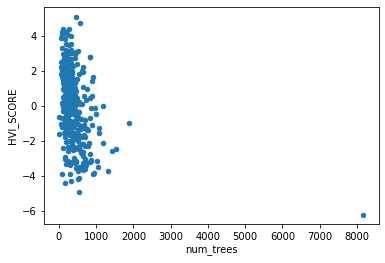

In [19]:
ax = heat.plot("num_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("num_trees");

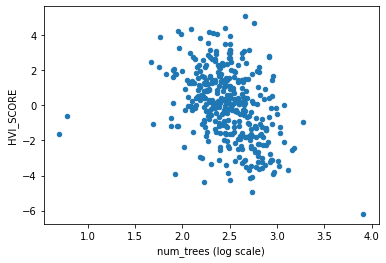

In [20]:
import numpy as np

heat["log_num_trees"] = np.log10(heat.num_trees)
ax = heat.plot("log_num_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("num_trees (log scale)");

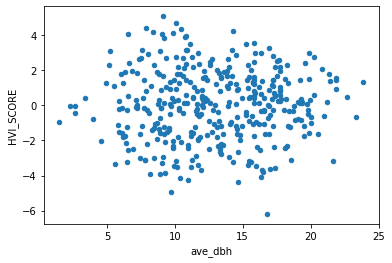

In [21]:
ax = heat.plot("ave_dbh", "HVI_SCORE", kind="scatter")
ax.set_xlabel("ave_dbh");

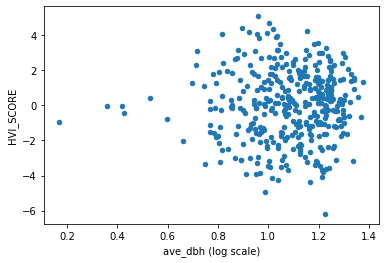

In [22]:
heat["log_ave_dbh"] = np.log10(heat.ave_dbh)
ax = heat.plot("log_ave_dbh", "HVI_SCORE", kind="scatter")
ax.set_xlabel("ave_dbh (log scale)");

In [23]:
heat["dbh_trees"] = heat["ave_dbh"] * heat["num_trees"]
heat

,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh,log_num_trees,log_ave_dbh,dbh_trees
0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458,2.283301,1.166177,2815.000000
1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750,2.633468,1.298979,8559.472589
2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750,2.505150,1.024024,3382.000000
3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359,2.290035,1.151503,2764.000000
4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631,2.274158,1.160967,2723.486631
...,...,...,...,...,...,...,...,...
369,42101036203,-1.626316,"POLYGON ((-74.9648847150604 40.0772810971776, ...",291,13.536082,2.463893,1.131493,3939.000000
370,42101035302,-0.934188,"POLYGON ((-74.9875706652257 40.0758346996955, ...",168,1.476190,2.225309,0.169142,248.000000
371,42101036201,-1.094011,"POLYGON ((-74.9849887222353 40.0745340963154, ...",161,15.776398,2.206826,1.198008,2540.000000
372,42101036302,-1.194634,"POLYGON ((-74.9798960441206 40.0938200532625, ...",76,17.210526,1.880814,1.235794,1308.000000


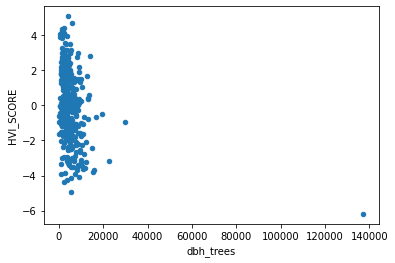

In [24]:
ax = heat.plot("dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees");

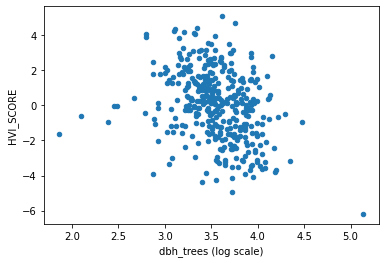

In [25]:
heat["log_dbh_trees"] = np.log10(heat.dbh_trees)
ax = heat.plot("log_dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees (log scale)");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


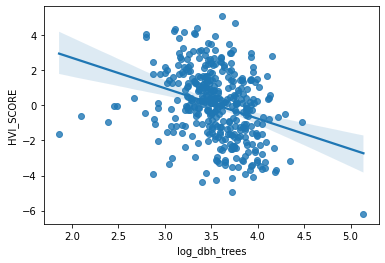

In [26]:
import seaborn as sns
sns.regplot(heat['log_dbh_trees'], heat['HVI_SCORE']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


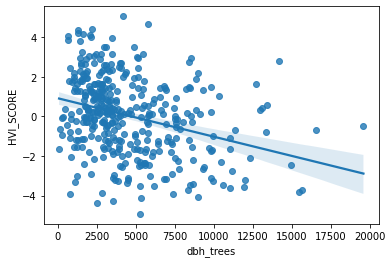

In [27]:
import seaborn as sns
new = heat[heat['dbh_trees']<20000]

sns.regplot(new["dbh_trees"], new['HVI_SCORE']);

In [28]:

import statsmodels.api as sma
X = sma.add_constant(heat["ave_dbh"])
result = sma.OLS(endog=heat["HVI_SCORE"], exog=X).fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              HVI_SCORE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3025
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.583
Time:                        17:25:33   Log-Likelihood:                -788.49
No. Observations:                 374   AIC:                             1581.
Df Residuals:                     372   BIC:                             1589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1544      0.322     -0.480      0.632      -0.787       0.478
ave_dbh        0.0130      0.024      0.550      0.583      -0.033       0.059
==============================================================================
Omnibus:                        2.419   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.181
Skew:                          -0.099   Prob(JB):                        0.336
Kurtosis:                       2.682   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X

,const,ave_dbh
0,1.0,14.661458
1,1.0,19.905750
2,1.0,10.568750
3,1.0,14.174359
4,1.0,14.486631
...,...,...
369,1.0,13.536082
370,1.0,1.476190
371,1.0,15.776398
372,1.0,17.210526


In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = heat[['ave_dbh', 'num_trees']].values
y = heat[["HVI_SCORE"]].values

reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.1109468053920648

In [32]:
reg.coef_

array([[ 0.01089403, -0.00138394]])

In [33]:
reg.intercept_

array([0.41068175])

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = heat[['num_trees']].values
y = heat[["HVI_SCORE"]].values

reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.11037315883795362

In [35]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [36]:
reg.score(X,y,sample_weight=None)

0.11037315883795362

In [37]:
X = heat[['log_dbh_trees', 'HVI_SCORE']].values
y = heat[["HVI_SCORE"]].values
#heat['HVI_SCORE'].values